In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Data Analysis

In [4]:
data= pd.read_csv('data/headbrain.csv')
data.head(), data.shape

(   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
 0       1          1             4512                 1530
 1       1          1             3738                 1297
 2       1          1             4261                 1335
 3       1          1             3777                 1282
 4       1          1             4177                 1590, (237, 4))

In [10]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


### Plotting our data to see if they have a linear relationship

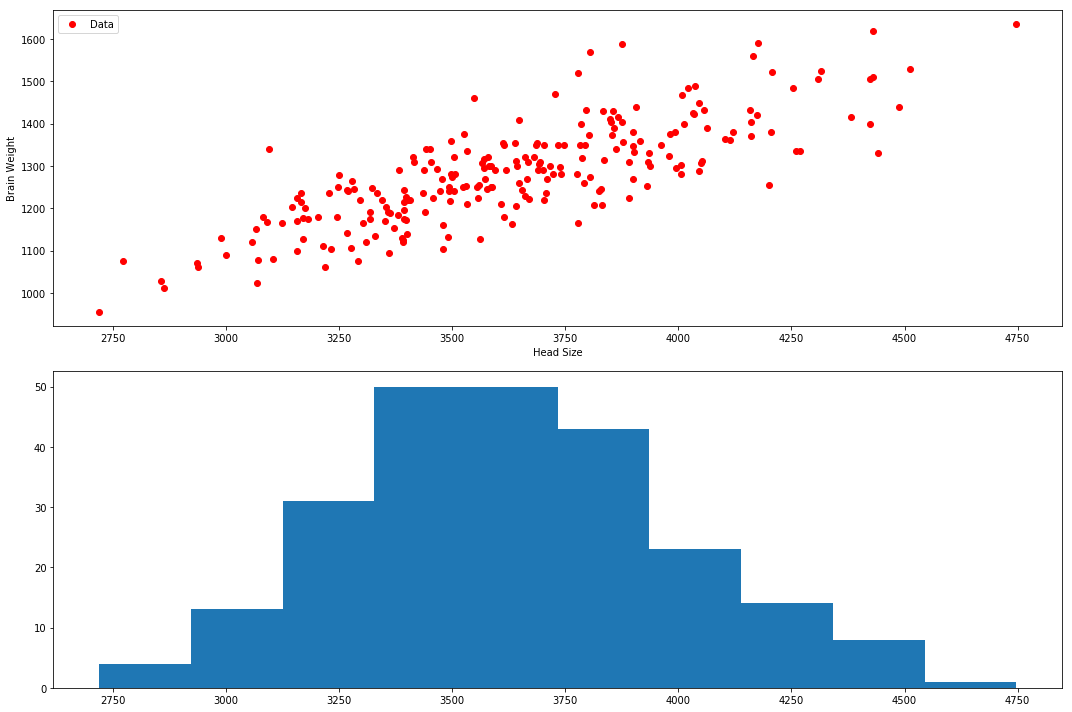

In [63]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.scatter(X, y, c='r', label='Data')
plt.legend()
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')

plt.subplot(2, 1, 2)
plt.hist(X)
plt.tight_layout()

### Calculating brain_weight using head_size.

In [8]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

## Our linear model is: brain_weight = b0  + b1 * head_size

### To find b1 and b0, we need mean(X) & mean(y)

In [11]:
mean_X = np.mean(X) ## or data.describe()['Head Size(cm^3)'][1]
mean_y = np.mean(y) ## or data.describe()['Brain Weight(grams)'][1]
mean_X, mean_y

(3633.9915611814345, 1282.873417721519)

In [14]:
## Total datapoints
m = len(X)
m

237

In [16]:
## Calculating b1 and b0

numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_X) * (y[i] - mean_y)
    denom += (X[i] - mean_X) ** 2
    
    
b1 = numer / denom
b0 = mean_y - (b1 * mean_X)

b0, b1

(325.57342104944223, 0.26342933948939945)

### Our linear model becomes: brain_weight = (325.5734)  + (0.2634) * head_size

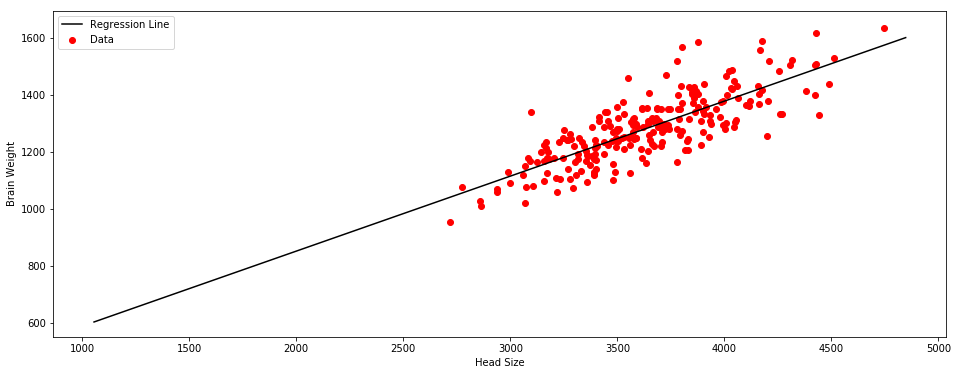

In [25]:
## Visualizing

max_X = np.max(X) + 100
min_X = np.min(y) + 100

## Calculating line
line_X = np.linspace(min_X, max_X, 1000)
line_y = b0 + b1 * line_X

plt.figure(figsize=(16, 6))
plt.plot(line_X, line_y, c='k', label='Regression Line')
plt.scatter(X, y, c='r', label='Data')
plt.legend()
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.show()

### Checking how good the model is using Root Mean Square Error

In [23]:
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
rmse

72.1206213783709

### Checking the goodness of fit (R squared)

In [64]:
ss_t = 0
ss_r = 0

for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2


r2 = 1 - (ss_r / ss_t)
print('R2: ', r2[0])

R2:  0.6393117199570003
